<a href="https://colab.research.google.com/github/Ian9090/solar-system/blob/master/Analyzing_Google_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unveiling the Android App Market: Analyzing Google Play Store Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
apps_df = pd.read_csv('/content/apps.csv')

# Data Preprocessing

# Check for null values
apps_df.isnull().sum()

# Drop rows with any null values
apps_df = apps_df.dropna()

# Convert 'Reviews' to integer
apps_df['Reviews'] = apps_df['Reviews'].astype(int)

# Ensure 'Installs' is a string before using .str accessor
apps_df['Installs'] = apps_df['Installs'].astype(str)
# Remove '+' and ',' from 'Installs' and convert to integer
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '')
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').astype(int)

apps_df["Current Ver"] = apps_df["Current Ver"].str.replace("Varies with device", "Unknown")
apps_df["Last Updated"] = pd.to_datetime(apps_df["Last Updated"])
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Unknown,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
user_rev_df = pd.read_csv("/content/user_reviews.csv")
#user_rev_df.head(20)

# Drop rows with any missing values
user_rev_df= user_rev_df.dropna()

# Correct data types
user_rev_df['Sentiment_Polarity'] = user_rev_df['Sentiment_Polarity'].astype(float)
user_rev_df['Sentiment_Subjectivity'] = user_rev_df['Sentiment_Subjectivity'].astype(float)

# Verify that there are no missing values and data types are correct
user_rev_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
# Combining the two cleaned dataframe

df = pd.merge(apps_df, user_rev_df, on="App")

df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [ ]:
# Category Exploration: Investigate app distribution across categories

# Count the number of apps in each category
category_counts = df['Category'].value_counts()

# Display the distribution of apps across categories
category_counts

,count
Category,
GAME,5029
FAMILY,1732
HEALTH_AND_FITNESS,1582
DATING,1500
MEDICAL,1153
FINANCE,1066
SPORTS,911
LIFESTYLE,897
PERSONALIZATION,816


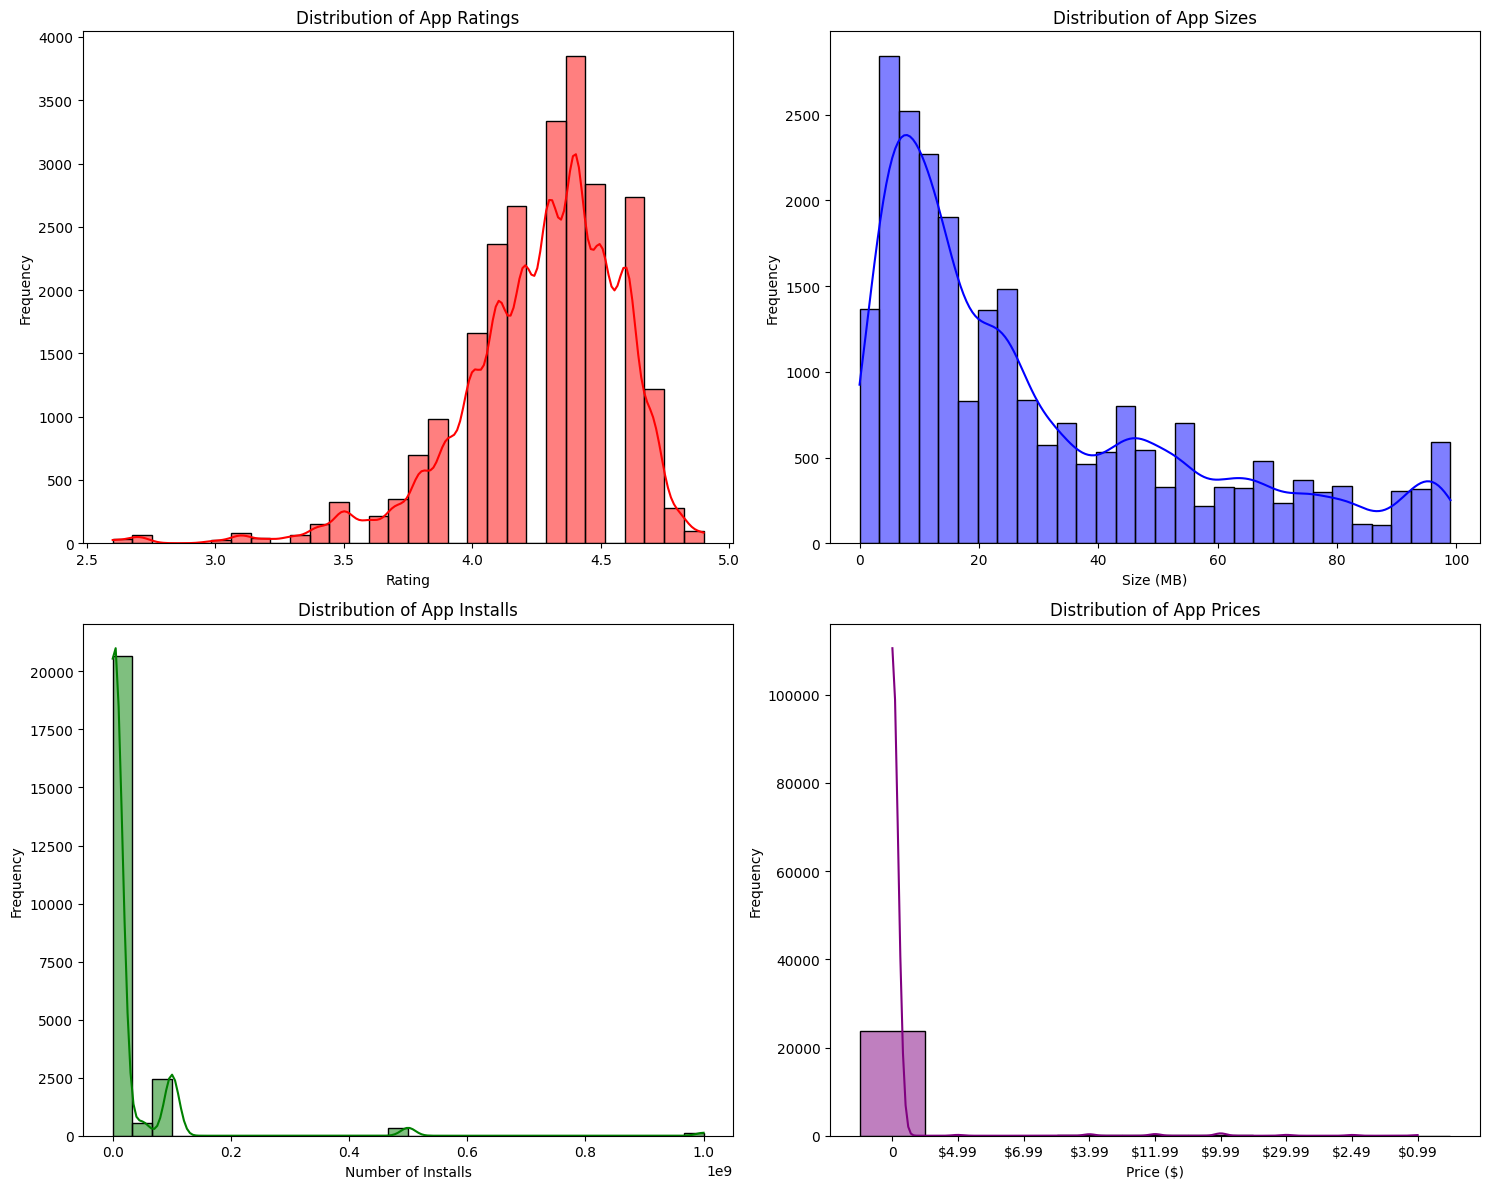

In [ ]:
# Metrics Analysis: Examine app ratings, size, popularity, and pricing trends using the user_rev_df

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting the distribution of app ratings
sns.histplot(df['Rating'], bins=30, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of App Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')

# Plotting the distribution of app sizes
sns.histplot(df['Size'], bins=30, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of App Sizes')
axes[0, 1].set_xlabel('Size (MB)')
axes[0, 1].set_ylabel('Frequency')

# Plotting the distribution of app installs
sns.histplot(df['Installs'], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of App Installs')
axes[1, 0].set_xlabel('Number of Installs')
axes[1, 0].set_ylabel('Frequency')

# Plotting the distribution of app prices
sns.histplot(df['Price'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of App Prices')
axes[1, 1].set_xlabel('Price ($)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

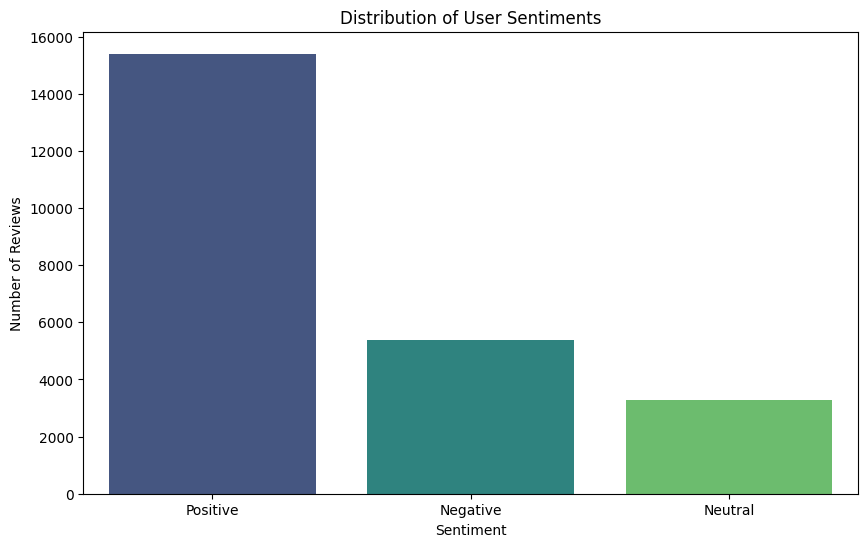

In [ ]:
# Sentiment Analysis: Assess user sentiments through reviews
# Group by sentiment and count the number of occurrences
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Interactive Visualization: Utilize code for compelling visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='viridis', hue='Sentiment')
plt.title('Distribution of User Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

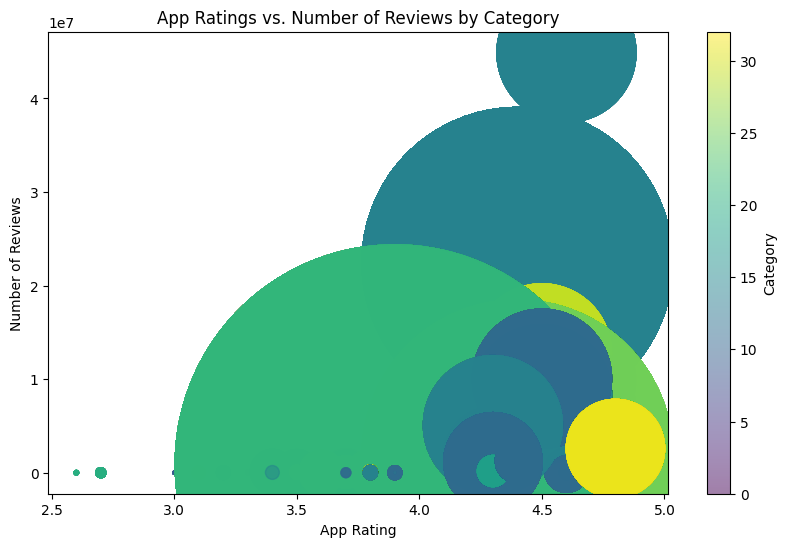

In [ ]:
# Skill Enhancement: Integrate insights from the "Understanding Data Visualization" course
# Create a scatter plot to visualize the relationship between Rating and Reviews
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Rating'], df['Reviews'], c=df['Category'].astype('category').cat.codes, s=df['Installs'] / 10000, alpha=0.5, cmap='viridis')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Category')

# Add labels and title
plt.xlabel('App Rating')
plt.ylabel('Number of Reviews')
plt.grid(False)
plt.title('App Ratings vs. Number of Reviews by Category')

# Show the plot
plt.show()

# **Insights and Recommendations**

**Insights:**

- Most apps have high ratings (4.0–4.5) with a few underperforming below 3.0.
- App sizes are generally under 50 MB, with larger apps being less common.
- Installs are concentrated among a few popular apps, while many have low downloads.
- Free apps dominate the market, with paid apps being rare and concentrated in lower price ranges.
- User sentiments are mostly positive, but addressing negative reviews can improve satisfaction.
- Categories with high ratings and reviews indicate strong user engagement.

**Recommendations:**

- Improve poorly rated apps by addressing user feedback.
- Optimize app sizes to appeal to storage-conscious users.
- Boost visibility and installs for lesser-known apps through marketing and ASO.
- Focus on monetization strategies for free apps while maintaining user experience.
- Address common issues highlighted in negative reviews.
- Prioritize investments in popular and highly engaged categories.